# Customer Churn - Focused Customer Retention Programs

<strong>Problem Statement : </strong>"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

### Loading the dataset

In [2]:
report = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
report.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
report.shape

(7043, 21)

In [5]:
report.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
report.duplicated().sum()

0

In [7]:
for i in report.columns:
    print(i)
    print(report[i].unique())
    print(len(report[i].unique()))
    print('-'*100)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7043
----------------------------------------------------------------------------------------------------
gender
['Female' 'Male']
2
----------------------------------------------------------------------------------------------------
SeniorCitizen
[0 1]
2
----------------------------------------------------------------------------------------------------
Partner
['Yes' 'No']
2
----------------------------------------------------------------------------------------------------
Dependents
['No' 'Yes']
2
----------------------------------------------------------------------------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
73
--------------------------------------------------------------

The `customerID` columns seems redundant for the prediction for the churn

In [8]:
report.drop(['customerID'], axis = 1, inplace = True)

In [9]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
report["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

The `TotalCharges` column has dtype as object when it should be int64/float64

In [11]:
report["TotalCharges"] = pd.to_numeric(report["TotalCharges"],errors = 'coerce')

errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
* If ‘raise’, then invalid parsing will raise an exception
* If ‘coerce’, then invalid parsing will be set as NaN
* If ‘ignore’, then invalid parsing will return the input

In [12]:
report["TotalCharges"].dtype

dtype('float64')

In [13]:
report.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting the `TotalCharges` column from object type to float type, we observe that there are 11 rows that have null values in it

In [14]:
report.dropna(inplace = True)

In [15]:
report.shape

(7032, 20)

In [16]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Exploratory Data Analysis

#### The ratio of gender

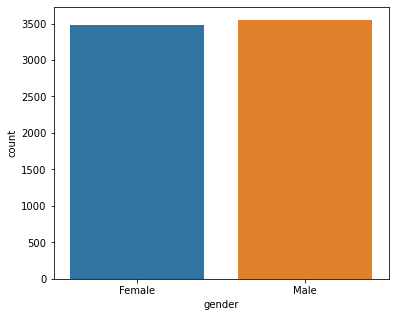

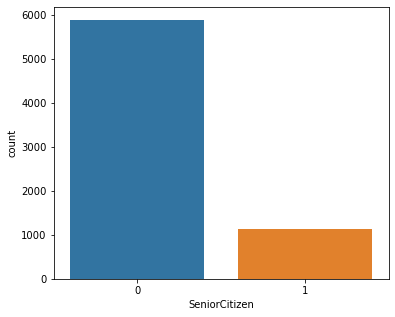

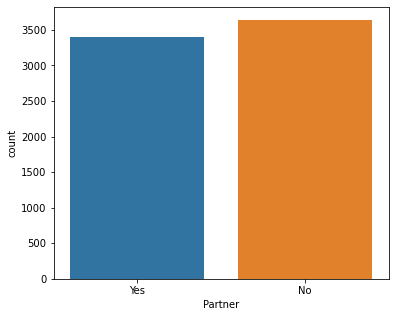

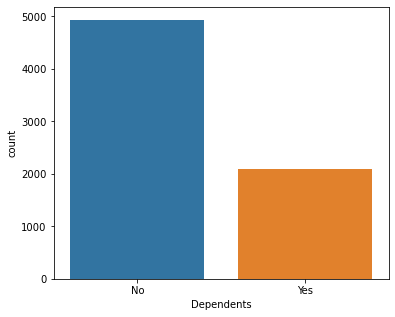

In [17]:
demograph = ["gender","SeniorCitizen", "Partner", "Dependents"]
for demo in demograph:
    plt.figure(figsize=(6,5))
    sns.countplot(x=report[demo])
    plt.show()

### Insights

* There are equal number of female and male
* There are very less number of senior citizens
* There are equal number of people who have partners
* There are almost half of the customers who have dependents

#### The ratio of customer churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

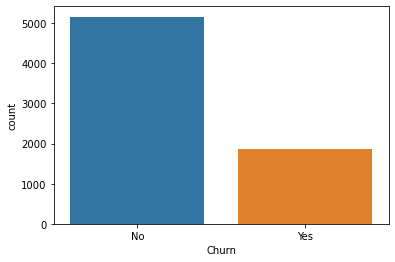

In [18]:
sns.countplot(x = report["Churn"])

In [19]:
report["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [20]:
print("There are {:.2f} % of customers who left the services.".format(len(report[report["Churn"] == "Yes"])/len(report)*100))

There are 26.58 % of customers who left the services.


 <font size="4">This is fairly one-fourth of the customers which is a very significant drop in the churn</font>

### Converting categorical columns into numeric columns

In [21]:
def categorical(report):
    for col in report.columns:
        if(report[col].dtype == np.object):
            print(col)
            print(report[col].unique())
            print()

In [22]:
categorical(report)

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



<ipython-input-21-907ee543b166>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(report[col].dtype == np.object):


#### Gender

In [23]:
report["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
report.replace({'Female':0, 'Male': 1}, inplace = True)

In [25]:
report.replace('No phone service', 'No', inplace = True)
report.replace('No internet service', 'No', inplace = True)

In [26]:
categorical(report)

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes']

OnlineBackup
['Yes' 'No']

DeviceProtection
['No' 'Yes']

TechSupport
['No' 'Yes']

StreamingTV
['No' 'Yes']

StreamingMovies
['No' 'Yes']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



<ipython-input-21-907ee543b166>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(report[col].dtype == np.object):


In [27]:
report.replace({'Yes':1, 'No': 0}, inplace = True)

In [28]:
categorical(report)

InternetService
['DSL' 'Fiber optic' 0]

Contract
['Month-to-month' 'One year' 'Two year']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



<ipython-input-21-907ee543b166>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(report[col].dtype == np.object):


Out of left columns, only three are categorical and they can be changed by One-Hot Encoding

In [29]:
report = pd.get_dummies(data = report, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [30]:
report.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [31]:
for i in report.columns:
    print(i)
    print(report[i].unique())
    print('-'*100)

gender
[0 1]
----------------------------------------------------------------------------------------------------
SeniorCitizen
[0 1]
----------------------------------------------------------------------------------------------------
Partner
[1 0]
----------------------------------------------------------------------------------------------------
Dependents
[0 1]
----------------------------------------------------------------------------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
----------------------------------------------------------------------------------------------------
PhoneService
[0 1]
----------------------------------------------------------------------------------------------------
MultipleLines
[0 1]
----------------------------------------------------------------

In [32]:
report.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_0                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [33]:
report.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

### Separating dependent and independent variables

In [34]:
X = report.drop(["Churn"], axis = 1)
y = report["Churn"]

In [35]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [36]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

### Training and testing set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,43,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3410,1,0,0,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5483,0,0,1,0,55,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
5524,1,0,1,1,45,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
6337,0,0,1,1,55,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,3,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5199,0,0,0,0,51,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
5235,1,0,0,0,9,1,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
5399,0,0,0,0,50,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [39]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

In [40]:
y_test_1

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
1733    0
5250    0
5465    0
5851    0
3984    0
Name: Churn, Length: 1407, dtype: int64

### Training the model

In [41]:
def best_model(algos, X_train, X_test, y_train, y_test):
    algo = algos
    algo.fit(X_train, y_train)
    train_score = algo.score(X_train, y_train)
    y_pred = algos.predict(X_test)
    test_score = algo.score(X_test, y_test)
    print(algos, "Score on training :", train_score )
    print(algos, "Score on testing :", test_score)
    print("-"*100)

In [42]:
algorithm = [LogisticRegression(), 
             DecisionTreeClassifier(), 
             RandomForestClassifier(), 
             SVC(), 
             KNeighborsClassifier()]

for algos in algorithm:
    best_model(algos, X_train_1, X_test_1, y_train_1, y_test_1)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() Score on training : 0.8092444444444444
LogisticRegression() Score on testing : 0.7882018479033405
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier() Score on training : 0.9976888888888888
DecisionTreeClassifier() Score on testing : 0.7185501066098081
----------------------------------------------------------------------------------------------------
RandomForestClassifier() Score on training : 0.9976888888888888
RandomForestClassifier() Score on testing : 0.7839374555792467
----------------------------------------------------------------------------------------------------
SVC() Score on training : 0.7342222222222222
SVC() Score on testing : 0.7341862117981521
----------------------------------------------------------------------------------------------------
KNeighborsClassifier() Score on training : 0.832
KNeighborsClassifier() Score on testing : 0.7711442786069652
------------------------

Logistic Regression performs the best out of the five algorithms. Since Logitic Regression is a gradient descent based algorithm, it requires feauture scaling

We have three columns namely `tenure`, `MonthlyCharges`, `TotalCharges` which have unscaled values. So we need to scale them

In [43]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [44]:
X_train_scaled

array([[-1.01378388, -0.43758982, -0.9624811 , ..., -0.52764485,
        -0.71475753, -0.54742719],
       [ 0.98640353, -0.43758982, -0.9624811 , ...,  1.89521417,
        -0.71475753, -0.54742719],
       [-1.01378388, -0.43758982,  1.03898144, ..., -0.52764485,
         1.39907586, -0.54742719],
       ...,
       [ 0.98640353, -0.43758982, -0.9624811 , ..., -0.52764485,
         1.39907586, -0.54742719],
       [-1.01378388, -0.43758982, -0.9624811 , ..., -0.52764485,
        -0.71475753, -0.54742719],
       [ 0.98640353,  2.28524509,  1.03898144, ..., -0.52764485,
         1.39907586, -0.54742719]])

In [45]:
lr_norm = LogisticRegression()
lr_norm.fit(X_train_scaled, y_train)
train_score = lr_norm.score(X_train_scaled, y_train)
y_pred = lr_norm.predict(X_test_scaled)
test_score = lr_norm.score(X_test_scaled, y_test)
print("Score on training :", train_score )
print("Score on testing :", test_score)

Score on training : 0.8087111111111112
Score on testing : 0.7882018479033405


The training score fairly changed from 0.8072888888888888 to 0.8087111111111112 and the testing score changed from 0.7860696517412935 to 0.7882018479033405
 

In [46]:
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 10, random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression()
lr_smote.fit(X_train_res, y_train_res)
train_score = lr_smote.score(X_train_res, y_train_res)
y_pred = lr_smote.predict(X_test_scaled)
test_score = lr_smote.score(X_test_scaled, y_test)
print("Score on training :", train_score )
print("Score on testing :", test_score)

Score on training : 0.7811138014527845
Score on testing : 0.7412935323383084


In [47]:
X_train_res.shape, y_train_res.shape

((8260, 26), (8260,))

### Evaluation metrics

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[748 285]
 [ 79 295]]


Text(33.0, 0.5, 'Actual')

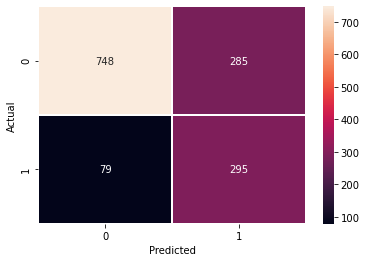

In [50]:
sns.heatmap(cm, annot = True, linewidths = 0.5, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [51]:
accuracy_score(y_test, y_pred)

0.7412935323383084